In [1]:
import pandas as pd
import datetime
import quandl
import matplotlib.pyplot as plt
import numpy as np

from datetime import datetime
%matplotlib inline

# Enter your quandl API key here
quandl.ApiConfig.api_key = open("quandl_code", "r").read()

In [2]:
# Grab Tesla stocks
tesla = quandl.get("WIKI/TSLA")

In [3]:
tesla.head()

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
2010-06-29,19.00,25.0000,17.54,23.89,18766300.0,0.0,1.0,19.00,25.0000,17.54,23.89,18766300.0
2010-06-30,25.79,30.4192,23.30,23.83,17187100.0,0.0,1.0,25.79,30.4192,23.30,23.83,17187100.0
2010-07-01,25.00,25.9200,20.27,21.96,8218800.0,0.0,1.0,25.00,25.9200,20.27,21.96,8218800.0
2010-07-02,23.00,23.1000,18.71,19.20,5139800.0,0.0,1.0,23.00,23.1000,18.71,19.20,5139800.0
2010-07-06,20.00,20.0000,15.83,16.11,6866900.0,0.0,1.0,20.00,20.0000,15.83,16.11,6866900.0


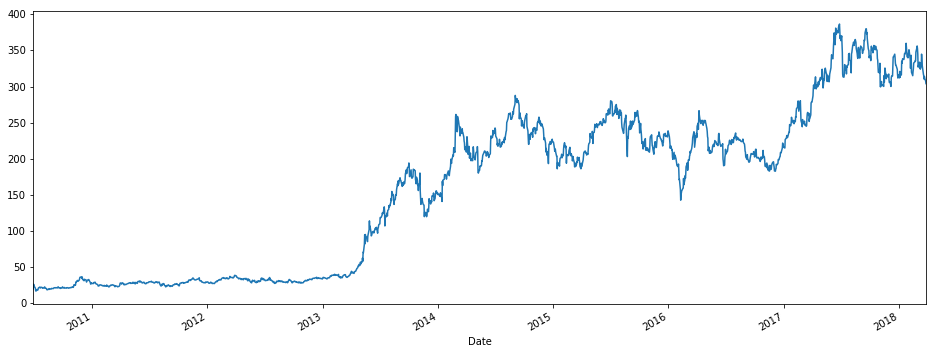

In [4]:
tesla["Open"].plot(figsize=(16, 6))

In [5]:
# grab Ford stocks
ford = quandl.get("WIKI/F")

In [6]:
ford.head()

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
1972-06-01,66.91,67.00,66.25,66.38,61628.0,0.0,1.0,0.715736,0.716699,0.708676,0.710067,1.089198e+06
1972-06-02,66.38,67.00,66.00,66.25,66398.0,0.0,1.0,0.710067,0.716699,0.706002,0.708676,1.173502e+06
1972-06-05,66.25,66.88,66.00,66.25,294680.0,0.0,1.0,0.708676,0.715415,0.706002,0.708676,5.208101e+06
1972-06-06,66.25,66.50,65.25,65.50,80424.0,0.0,1.0,0.708676,0.711350,0.697979,0.700653,1.421394e+06
1972-06-07,65.50,65.88,65.13,65.13,38011.0,0.0,1.0,0.700653,0.704718,0.696695,0.696695,6.717969e+05


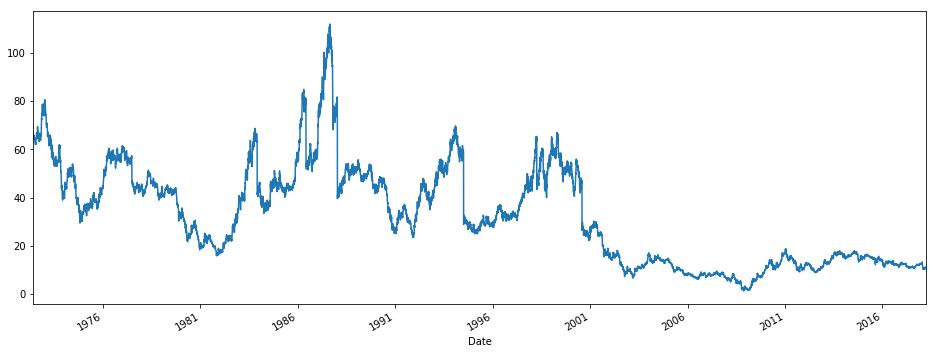

In [7]:
ford["Open"].plot(figsize=(16, 6))

In [8]:
gm = quandl.get("WIKI/GM")

In [9]:
gm.head()

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
2010-11-18,35.00,35.99,33.89,34.19,457044300.0,0.0,1.0,29.988317,30.836558,29.037259,29.294302,457044300.0
2010-11-19,34.15,34.50,33.11,34.26,107842000.0,0.0,1.0,29.260029,29.559912,28.368948,29.354278,107842000.0
2010-11-22,34.20,34.48,33.81,34.08,36650600.0,0.0,1.0,29.302870,29.542776,28.968714,29.200053,36650600.0
2010-11-23,33.95,33.99,33.19,33.25,31170200.0,0.0,1.0,29.088668,29.122940,28.437493,28.488901,31170200.0
2010-11-24,33.73,33.80,33.22,33.48,26138000.0,0.0,1.0,28.900170,28.960146,28.463197,28.685967,26138000.0


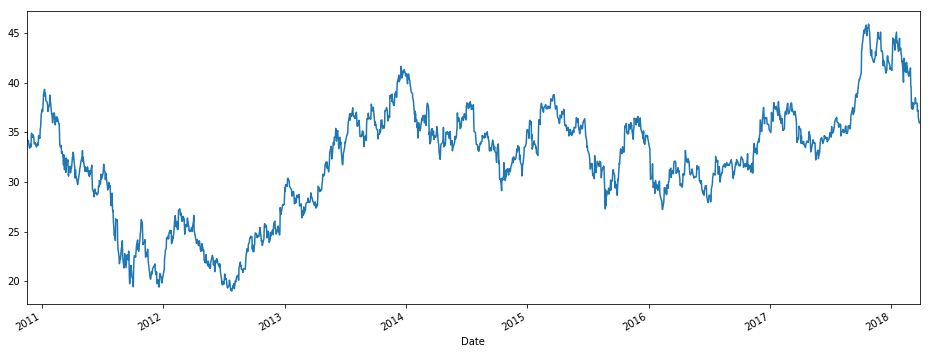

In [10]:
gm["Open"].plot(figsize=(16, 6))

In [11]:
min_index = max(gm.index[0], tesla.index[0], ford.index[0])
max_index = min(gm.index[-1], tesla.index[-1], ford.index[-1])

In [12]:
ford = ford.loc[(ford.index >= min_index) & (ford.index <= max_index)]
tesla = tesla.loc[(tesla.index >= min_index) & (tesla.index <= max_index)]
gm = gm.loc[(gm.index >= min_index) & (gm.index <= max_index)]

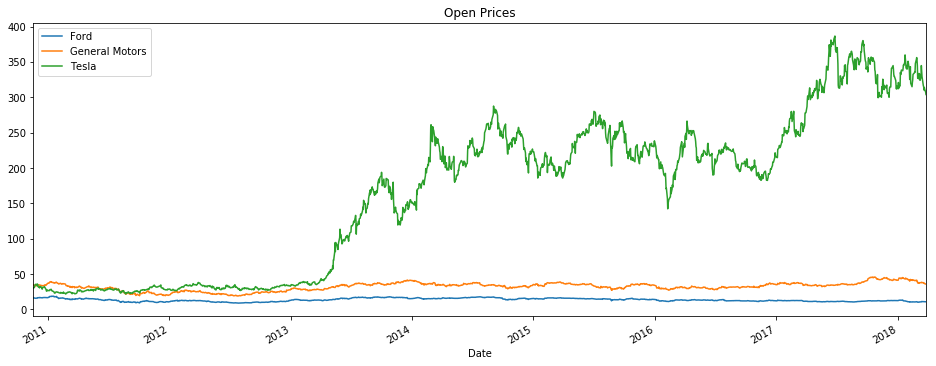

In [13]:
ford["Open"].plot(label="Ford", title="Open Prices")
gm["Open"].plot(label="General Motors")
tesla["Open"].plot(figsize=(16, 6), label="Tesla")
plt.legend();

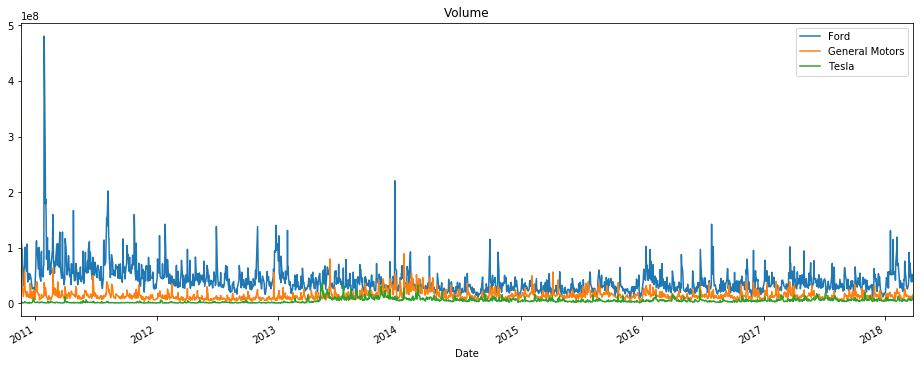

In [14]:
ford["Volume"].plot(label="Ford", title="Volume")
gm["Volume"].plot(label="General Motors")
tesla["Volume"].plot(figsize=(16, 6), label="Tesla")
plt.legend();

## Moving averages for Tesla

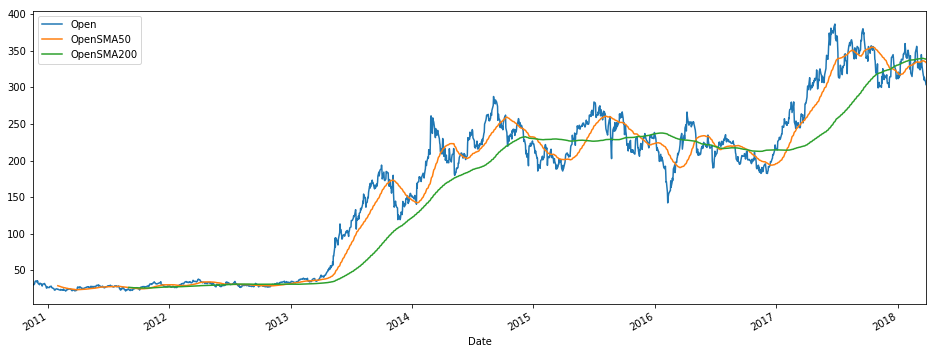

In [15]:
tesla["OpenSMA50"] = tesla["Open"].rolling(window=50).mean()
tesla["OpenSMA200"] = tesla["Open"].rolling(window=200).mean()
tesla[["Open", "OpenSMA50", "OpenSMA200"]].plot(figsize=(16, 6))

## Scatter matrix to see correlation between companies

In [16]:
from pandas.plotting import scatter_matrix


In [18]:
open_prices = pd.concat([tesla["Open"], gm["Open"], ford["Open"]], axis=1)
open_prices.columns = ["Tesla Open", "GM Open", "Ford Open"]
open_prices.head()

,Tesla Open,GM Open,Ford Open
Date,,,
2010-11-18,30.67,35.00,16.77
2010-11-19,30.16,34.15,16.02
2010-11-22,31.57,34.20,16.26
2010-11-23,33.29,33.95,16.01
2010-11-24,35.27,33.73,15.95


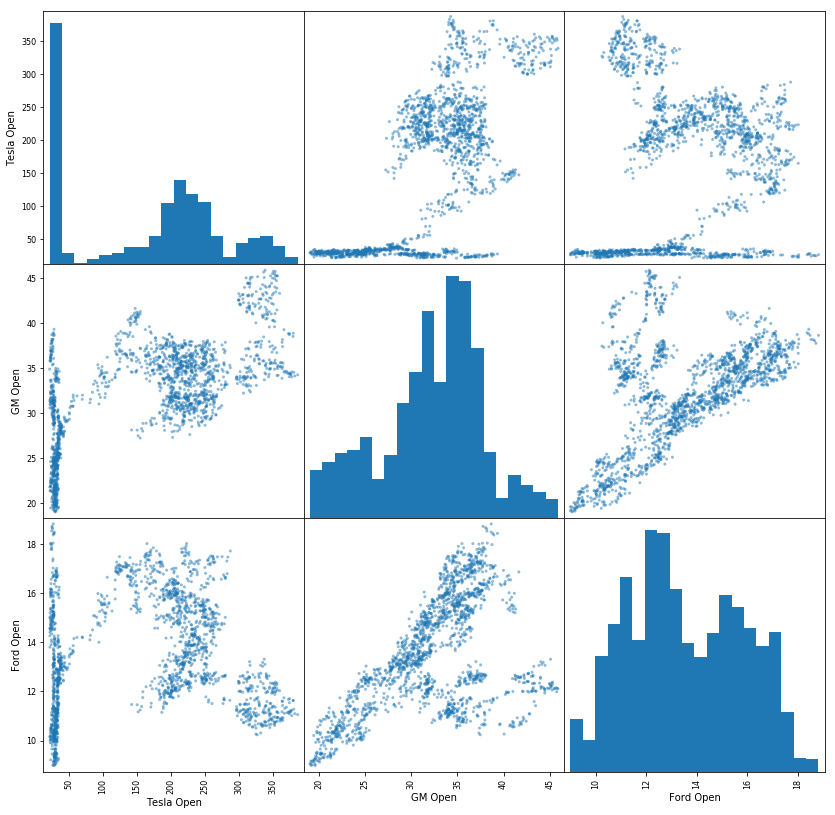

In [25]:
scatter_matrix(open_prices, figsize=(14, 14), alpha=0.5, hist_kwds={"bins": 20});

### Observation:
There is clearly positive correlation between General Motors and Ford's stocks

## Percentage Returns

Percentage returns is defined as the amount of returns you would get if you would buy the stock yesterday and sell it today. 

$$\text{Return} = \frac{p_i}{p_{i-1}} - 1$$
Where,
1. p_i = Stock price on i
2. p_i-1 = Stock price on day i - 1

### Percentage Returns on Tesla

In [37]:
tesla["returns"] = tesla["Open"] / tesla["Open"].shift(1) - 1
gm["returns"] = gm["Open"] / gm["Open"].shift(1) - 1
ford["returns"] = ford["Open"] / ford["Open"].shift(1) - 1

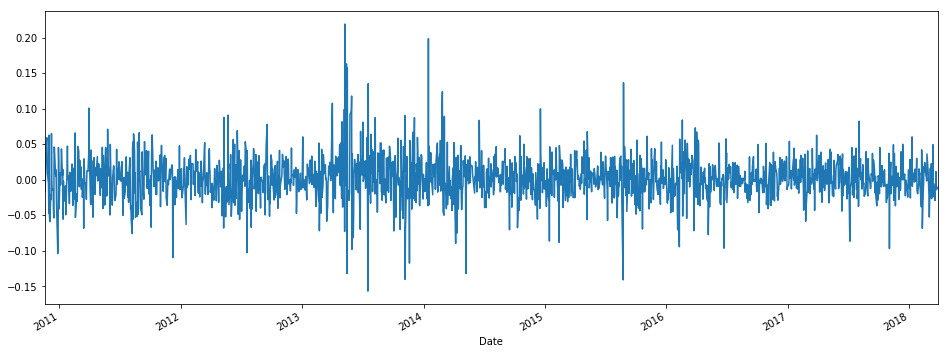

In [38]:
tesla["returns"].plot(figsize=(16, 6))

## Volatility

We can study the volatility of the stock by looking at the histogram of the returns. We can answer questions like is this stock stable? Unstable stocks are risky than stable ones, but might offer higher returns in the short run. 

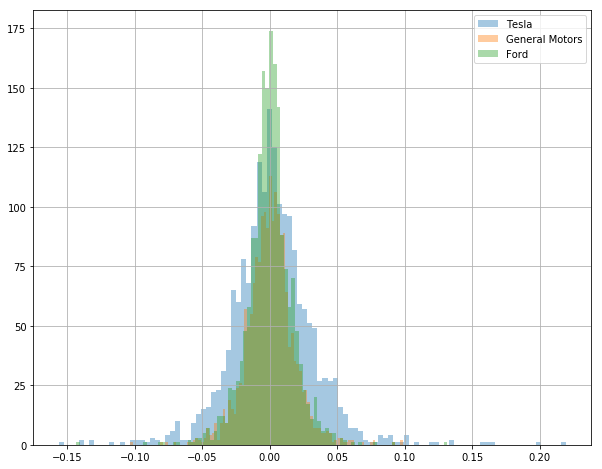

In [51]:
tesla["returns"].hist(bins=100, figsize=(10, 8), label="Tesla", alpha=0.4)
gm["returns"].hist(bins=100, label="General Motors", alpha=0.4)
ford["returns"].hist(bins=100, label="Ford", alpha=0.4)
plt.legend();

### Obervation:
We can see that Tesla has more standard deviation than the other two, hence is more unstable. 

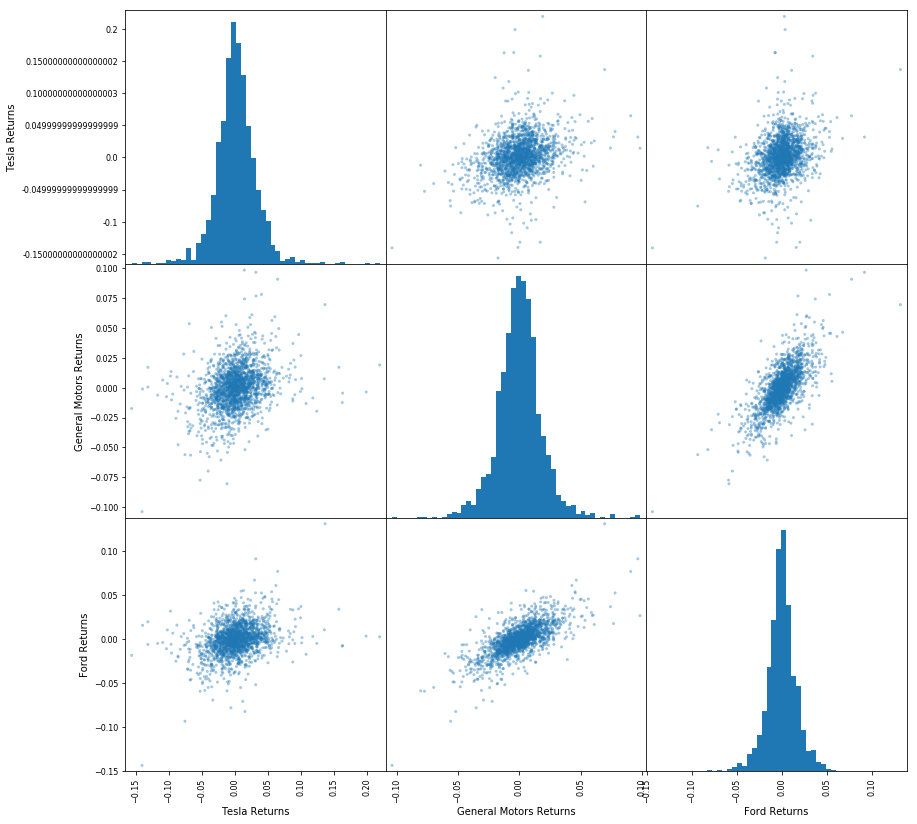

In [56]:
returns_matrix = pd.concat([tesla["returns"], gm["returns"], ford["returns"]], axis=1)
returns_matrix.columns = ["Tesla Returns", "General Motors Returns", "Ford Returns"]
scatter_matrix(returns_matrix, figsize=(14, 14), alpha=0.4, hist_kwds={"bins": 50});